In [89]:
# Importing Required Libraries
import numpy as np
import pandas as pd
import os
import pandas_datareader as web
import matplotlib.pyplot as plt
from matplotlib import style
import pickle
from matplotlib import style

In [90]:
import requests
from bs4 import BeautifulSoup

In [91]:
import datetime as dt

In [92]:
def savesp500tickers():
  result= requests.get('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
  soup= BeautifulSoup(result.text,"lxml")
  table=soup.find('table')
  tickers=[]
  company=[]

  for row in table.find_all('tr')[1:]:
    ticker= row.find_all('td')[0].text
    stock= row.find_all('td')[1].text
    tickers.append(ticker)
    company.append(stock)

  with open("sp500ticker.pickle","wb") as f:
    pickle.dump(tickers,f)

  with open("sp500company.pickle","wb") as f:
    pickle.dump(company,f)
  
  for i in range(0,len(tickers)):
    print(tickers[i],"is the symbol for",company[i])
  


In [93]:
savesp500tickers()

MMM
 is the symbol for 3M Company
ABT
 is the symbol for Abbott Laboratories
ABBV
 is the symbol for AbbVie Inc.
ABMD
 is the symbol for ABIOMED Inc
ACN
 is the symbol for Accenture plc
ATVI
 is the symbol for Activision Blizzard
ADBE
 is the symbol for Adobe Inc.
AMD
 is the symbol for Advanced Micro Devices Inc
AAP
 is the symbol for Advance Auto Parts
AES
 is the symbol for AES Corp
AFL
 is the symbol for AFLAC Inc
A
 is the symbol for Agilent Technologies Inc
APD
 is the symbol for Air Products & Chemicals Inc
AKAM
 is the symbol for Akamai Technologies Inc
ALK
 is the symbol for Alaska Air Group Inc
ALB
 is the symbol for Albemarle Corp
ARE
 is the symbol for Alexandria Real Estate Equities
ALXN
 is the symbol for Alexion Pharmaceuticals
ALGN
 is the symbol for Align Technology
ALLE
 is the symbol for Allegion
ADS
 is the symbol for Alliance Data Systems
LNT
 is the symbol for Alliant Energy Corp
ALL
 is the symbol for Allstate Corp
GOOGL
 is the symbol for Alphabet Inc. (Class A)

In [94]:
if not os.path.exists('stock_data'):
    os.makedirs('stock_data')
start= dt.datetime(2020,5,1)
end= dt.datetime(2020,7,2)

In [95]:
x=input("Enter the Symbol of company: ")
df= web.DataReader(x,'yahoo',start,end)
df.to_csv('stock_data/stock.csv')

Enter the Symbol of company: GOOGL


In [96]:
stock= pd.read_csv('stock_data/stock.csv')

In [97]:
stock.tail()

,Date,High,Low,Open,Close,Volume,Adj Close
39,2020-06-26,1437.02002,1355.000000,1432.630005,1362.540039,4882000,1362.540039
40,2020-06-29,1398.00000,1351.650024,1360.339966,1397.170044,2253700,1397.170044
41,2020-06-30,1424.00000,1386.930054,1396.880005,1418.050049,2014300,1418.050049
42,2020-07-01,1448.47998,1414.180054,1419.170044,1442.000000,2109100,1442.000000
43,2020-07-02,1488.52002,1451.069946,1451.839966,1469.930054,2860900,1469.930054


**Single Variable Linear Regression**

In [98]:
X = stock['Open'].values

In [99]:
y = stock['Adj Close'].values

In [100]:
from sklearn.model_selection import  train_test_split
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size = 0.21, random_state=0)

In [102]:
def Slope(a,b):
  n=len(a)
  slope=(n*np.sum(a*b)-np.sum(a)*np.sum(b))/(n*np.sum(a**2)-(np.sum(a))**2)
  return slope

def Intercept(a,b):
  intercept = np.mean(b)-Slope(a,b)*np.mean(a)
  return intercept

def prediction1(a,b,x):
  pred1 = Slope(a,b)*x + Intercept(a,b)
  return pred1

In [103]:
def R_squared(pred,testing_set):
  a=pred
  b=testing_set
  ss_total=np.sum((b-np.mean(b))**2)
  ss_res=np.sum((b-a)**2)
  R_2=1-(ss_res/ss_total)
  return R_2

In [104]:
def Covariance(a,b):
  n=len(a)
  two_sum=np.mean(a*b)
  cov=two_sum/n-np.mean(a)*np.mean(b)
  return cov

In [105]:
def correlation_coeff(pred,testing_set):
  a=pred
  b=testing_set
  n=len(a)
  score=(n*np.sum(a*b)-np.sum(a)*np.sum(b))/np.sqrt((n*np.sum(a**2)-(np.sum(a))**2)*(n*np.sum(b**2)-(np.sum(b))**2))
  return score

In [106]:
covariance = Covariance(X,y)
covariance

-1938852.0815770638

In [107]:
slope=Slope(Xtrain,ytrain)
intercept=Intercept(Xtrain,ytrain)
print(slope)
print(intercept)

0.8724616348060591
181.23056927692028


In [108]:
prediction = prediction1(Xtrain,ytrain,Xtest)
prediction

array([1393.5072777 , 1457.88625582, 1456.34198168, 1368.92136848,
       1357.53570154, 1425.60517533, 1438.47398444, 1369.15684366,
       1429.91508468, 1445.42747811])

In [109]:
r2score = R_squared(prediction,ytest)
r2score

0.6232164780141658

In [110]:
corrcoef = correlation_coeff(prediction,ytest)
corrcoef

0.8486784101275222

In [111]:
linreg = slope * X + intercept

Text(0.5, 1.0, 'Single Variable Linear Regression')

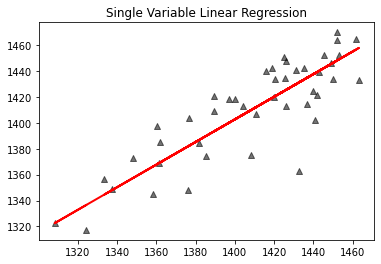

In [112]:
plt.scatter(X,y,marker='^',color='k',alpha=0.55)
plt.plot(X,linreg,color='R',linewidth=2)
plt.title('Single Variable Linear Regression')

**Multi Variable Linear Regression**

In [113]:
X1 = stock['Open'].values
train_size = int(0.78 * len(df))
X1train = X1[:train_size]
X1test = X1[train_size:]

In [114]:
X2 = stock['High'].values
train_size = int(0.79 * len(df))
X2train = X2[:train_size]
X2test = X2[train_size:]
len(X2test)

10

In [115]:
y = stock['Adj Close'].values
train_size = int(0.79 * len(df))
ytrain = y[:train_size]
ytest = y[train_size:]
len(ytest)

10

In [116]:
def Slope1(a1,a2,b):
  n = len(a1)
  numerator1 = ((n*np.sum(a2**2)) - (np.sum(a2)**2)) * ((n*np.sum(a1*b)) - (np.sum(a1)*np.sum(b)))
  numerator2 = ((n*np.sum(a1*a2)) - (np.sum(a1)*np.sum(a2))) * ((n*np.sum(a2*b)) - (np.sum(a2)*np.sum(b)))

  denominator1 = ((n*np.sum(a1**2)) - (np.sum(a1)**2)) * ((n*np.sum(a2**2)) - (np.sum(a2)**2))
  denominator2 = ((n*np.sum(a1*a2)) - (np.sum(a1)*np.sum(a2)))**2
  
  slope1 = (numerator1 - numerator2) / (denominator1 - denominator2)
  return slope1 

In [117]:
def Slope2(a1,a2,b):
  n = len(a1)
  numerator1 = ((n*np.sum(a1**2)) - (np.sum(a1)**2)) * ((n*np.sum(a2*b)) - (np.sum(a2)*np.sum(b)))
  numerator2 = ((n*np.sum(a1*a2)) - (np.sum(a1)*np.sum(a2))) * ((n*np.sum(a1*b)) - (np.sum(a1)*np.sum(b)))

  denominator1 = ((n*np.sum(a1**2)) - (np.sum(a1)**2)) * ((n*np.sum(a2**2)) - (np.sum(a2)**2))
  denominator2 = ((n*np.sum(a1*a2)) - (np.sum(a1)*np.sum(a2)))**2
  
  slope2 = (numerator1 - numerator2) / (denominator1 - denominator2)
  return slope2 

In [118]:
def Intercept2(a1,a2,b):
  intercept2 = np.mean(b)-Slope1(a1,a2,b)*np.mean(a1) - Slope2(a1,a2,b)*np.mean(a2)
  return intercept2

In [119]:
def prediction2(a1,a2,b,x1,x2):
  pred2 = Slope1(a1,a2,b)*x1 + Slope2(a1,a2,b)*x2 + Intercept2(a1,a2,b)
  return pred2

In [120]:
def R_squared(pred,testing_set):
  a=pred
  b=testing_set
  ss_total=np.sum((b-np.mean(b))**2)
  ss_res=np.sum((b-a)**2)
  R_2=1-(ss_res/ss_total)
  return R_2

In [121]:
def correlation_coeff(pred,testing_set):
  a=pred
  b=testing_set
  n=len(a)
  score=(n*np.sum(a*b)-np.sum(a)*np.sum(b))/np.sqrt((n*np.sum(a**2)-(np.sum(a))**2)*(n*np.sum(b**2)-(np.sum(b))**2))
  return score

In [122]:
slope1 = Slope1(X1train,X2train,ytrain)
slope2 = Slope2(X1train,X2train,ytrain)

In [123]:
intercept = Intercept2(X1train,X2train,ytrain)
intercept

-29.32605353899976

In [124]:
prediction= prediction2(X1train,X2train,ytrain,X1test,X2test)
prediction

array([1428.21096808, 1438.90931837, 1462.82740175, 1461.33127154,
       1427.30366558, 1420.64652155, 1387.80645143, 1411.963404  ,
       1437.07780479, 1478.89657026])

In [125]:
r2score2 = R_squared(prediction,ytest)
r2score2

0.4845333010038645

In [126]:
correcoef2 = correlation_coeff(prediction,ytest)
correcoef2

0.7255537139363231

In [127]:
linreg = slope1*X1  +slope2*X2+ intercept

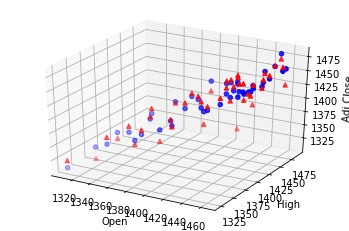

In [128]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(2)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X1, X2, y, c='r', marker='^')
ax.scatter(X1,X2,linreg,c='blue',marker ='o')
ax.set_xlabel('Open')
ax.set_ylabel('High')
ax.set_zlabel('Adj Close')

plt.show()